# **Dilation, Erosion and Edge Detection**

####**In this lesson we'll learn:**
1. Dilation
2. Erosion
3. Opening
4. Closing
5. Canny Edge Detection

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -qq images.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=75aaa5f4-1c2d-49c1-a44c-41d7ef555e09
To: /content/images.zip
100% 29.6M/29.6M [00:01<00:00, 23.7MB/s]


- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

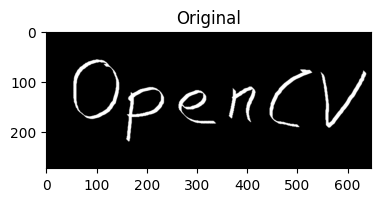

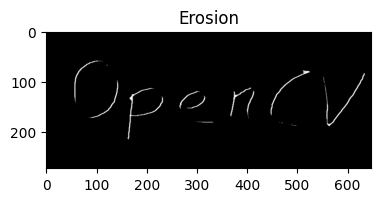

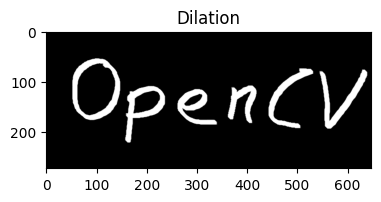

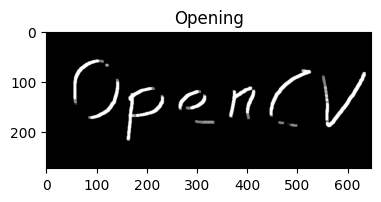

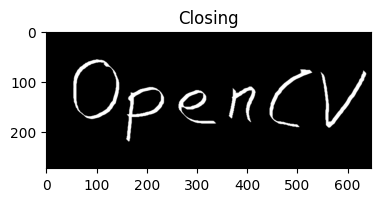

In [ ]:
import cv2
import numpy as np

image = cv2.imread('images/opencv_inv.png', 0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

## **Canny Edge Detection**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively.
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

Edge detection needs a threshold to tell what difference/change should be counted as edge

In [ ]:
image = cv2.imread('images/londonxmas.jpeg',0)

imshow('image', image)
# Canny Edge Detection은 그라데이션 값을 임계값으로 사용합니다
# 첫 번째 임계값 기울기
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# 넓은 에지 임계값은 많은 에지를 예상합니다
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# 좁은 임계값, 더 적은 에지 예상
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

## 그러면 threshold1과 threshold2 두 개의 값을 제공해야 합니다. threshold2보다 큰 그라데이션 값
# 는 에지로 간주됩니다. threshold1 미만의 값은 에지가 아닌 것으로 간주됩니다.
#threshold1과 threshold2 사이의 값은 그 방법에 따라 에지 또는 비 에지로 분류됩니다
#intensity는 "연결"되어 있습니다. 이 경우 60 미만의 그라데이션 값은 가장자리가 아닌 것으로 간주됩니다
#whereas 120 이상의 값은 에지로 간주됩니다.

Output hidden; open in https://colab.research.google.com to view.

#### **Auto Canny**

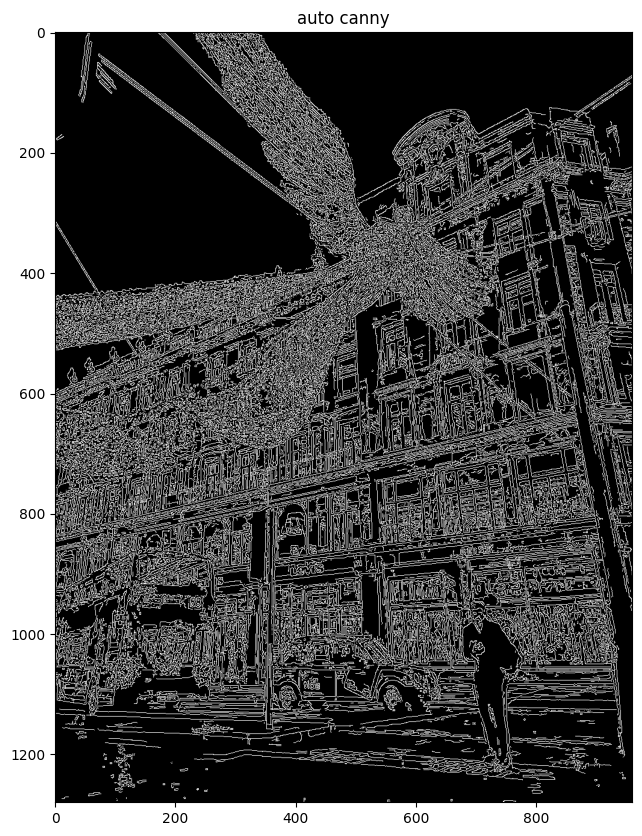

In [5]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image)
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)